In [1]:
import cv2
import numpy as np
from PIL import Image

In [3]:
# Read image
img = cv2.imread("../data/supra.jpeg").astype(np.float)
H, W, C = img.shape

b = img[:, :, 0].copy()
g = img[:, :, 1].copy()
r = img[:, :, 2].copy()

# Gray scale
gray = 0.2126 * r + 0.7152 * g + 0.0722 * b
gray = gray.astype(np.uint8)

In [4]:
# sobel Filter
K_size = 3

## Zero padding
pad = K_size // 2
out = np.zeros((H + pad*2, W + pad*2), dtype=np.float)
out[pad:pad+H, pad:pad+W] = gray.copy().astype(np.float)
tmp = out.copy()

## Emboss vertical
K = [[-2., -1., 0.],[-1., 1., 1.], [0., 1., 2.]]


In [5]:
for y in range(H):
    for x in range(W):
        out[pad+y, pad+x] = np.sum(K * (tmp[y:y+K_size, x:x+K_size]))

out = out[pad:pad+H, pad:pad+W].astype(np.uint8)

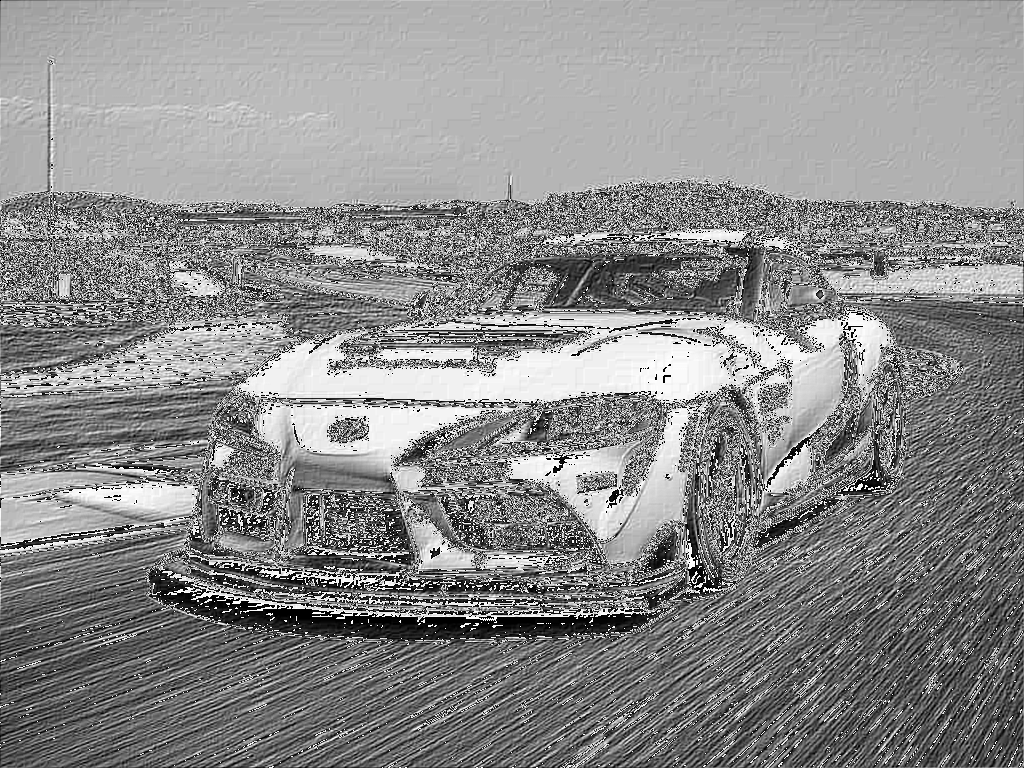

In [6]:
Image.fromarray(out)

In [7]:
cv2.imwrite('./out18_EmbossFilter.jpg', out)

True